## Plazas Disponibles Hotelero 2024 - random_forest

**Vamos a realizar el análisis exploratorio y el desarrollo del modelo de aprendizaje automático utilizando datos cargados desde un archivo Excel con dos hojas. Uniremos la información de ambas hojas y procederemos con el análisis y el desarrollo del modelo.**

**A** **Paso 1: Importar las librerías necesarias**

In [321]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday, DateOffset, Easter 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

- pandas: Para manipulación y análisis de datos.
- matplotlib.pyplot y seaborn: Para visualización de datos.
- numpy: Para operaciones numéricas y manejo de matrices.
- seaborn: Para visualización de datos estadísticos basada en matplotlib.
- sklearn.model_selection: Para dividir los datos en conjuntos de entrenamiento y prueba.
- sklearn.ensemble: Para crear modelos de aprendizaje automático que combinan predicciones de múltiples estimadores, como RandomForestRegressor
- sklearn.metrics: Para evaluar el rendimiento de los modelos de aprendizaje automático.
- pandas.tseries.holiday: Para manejar y definir calendarios de días festivos.
- train_test_split: Para dividir los datos en conjuntos de entrenamiento y prueba.
- sklearn.tree: Para crear modelos de árboles de decisión.
- RandomForestRegressor: Para construir el modelo de regresión de Random Forest.
- sklearn.linear_model: Para crear modelos de regresión lineal.
- sklearn.svm: Para crear modelos de máquinas de soporte vectorial para regresión.
- mean_squared_error y r2_score: Para evaluar el rendimiento del modelo

**Paso 2: Carga y Preparación de Datos - Carga de Datos desde Excel**

In [325]:
#import pandas as pd

# Cargar los datos desde un archivo Excel
#file_path = 'path/to/your/dataset.xlsx'
sheet1 = pd.read_excel("../data/external/LIMPIO_16_3_02_Oferta_Hotelera_por-sector_LIMPIO.xlsx", sheet_name='Ushuaia_1')
#datos1 = pd.read_excel("../data/external/LIMPIO_16_3_02_Oferta_Hotelera_por-sector_LIMPIO.xlsx", sheet_name="Ushuaia_1", skipfooter=2)
sheet2 = pd.read_excel("../data/external/LIMPIO_16_3_02_Oferta_Hotelera_por-sector_LIMPIO.xlsx", sheet_name='Ushuaia_2')

# Unir los datos de las dos hojas
data = pd.concat([sheet1, sheet2], ignore_index=True)
data.head()

,Periodo,Mes,Establecimientos,Plazas disponibles,Habitaciones o Unidades disponibles
0,2008,enero,43,96224,38936
1,2008,febrero,44,87580,34945
2,2008,marzo,44,96069,38998
3,2008,abril,43,90570,36480
4,2008,mayo,42,90737,37386


- Se carga un archivo Excel con dos hojas en dos dataframes separados.
- Luego, se combinan estos dos dataframes en uno solo.

**Paso 3: Modificar nombres de los meses a Ingles**

In [329]:
# Mapeo de los nombres de los meses en español a inglés
month_mapping = {
    'enero': 'January', 'febrero': 'February', 'marzo': 'March', 'abril': 'April',
    'mayo': 'May', 'junio': 'June', 'julio': 'July', 'agosto': 'August',
    'septiembre': 'September', 'octubre': 'October', 'noviembre': 'November', 'diciembre': 'December'
}

data['Mes'] = data['Mes'].str.lower().map(month_mapping)

# Convertir el periodo y mes en formato de fecha
data['Fecha'] = pd.to_datetime(data['Periodo'].astype(str) + '-' + data['Mes'], format='%Y-%B')

# Ordenar los datos por fecha
data = data.sort_values('Fecha')
data.head()

,Periodo,Mes,Establecimientos,Plazas disponibles,Habitaciones o Unidades disponibles,Fecha
0,2008,January,43,96224,38936,2008-01-01
194,2008,January,104,70649,21452,2008-01-01
195,2008,February,103,64467,19372,2008-02-01
1,2008,February,44,87580,34945,2008-02-01
2,2008,March,44,96069,38998,2008-03-01


- Convierte los nombres de los meses de español a inglés usando un diccionario de mapeo.

In [332]:
# Verificar si hay valores no numéricos en la columna 'Plazas disponibles'
non_numeric_values = data[~data['Plazas disponibles'].apply(lambda x: str(x).replace(',', '').replace('.', '').isdigit())]
print(non_numeric_values)

     Periodo        Mes Establecimientos Plazas disponibles  \
341     2020      April                -                  -   
147     2020      April                -                  -   
148     2020        May                -                  -   
342     2020        May                -                  -   
149     2020       June                s                  s   
343     2020       June                s                  s   
150     2020       July                s                  s   
344     2020       July                s                  s   
345     2020     August                s                  s   
151     2020     August                s                  s   
152     2020  September                s                  s   
346     2020  September                s                  s   
347     2020    October                s                  s   
153     2020    October                s                  s   

    Habitaciones o Unidades disponibles      Fecha  
3

- Convierte la columna 'Plazas disponibles' a tipo string.

**Paso 4: Eliminar Filas no Numericas**

In [336]:
# Eliminar filas con valores no numéricos en 'Plazas disponibles'
data = data[data['Plazas disponibles'].apply(lambda x: str(x).replace(',', '').replace('.', '').isdigit())]

- Verifica y elimina filas que contienen valores no numéricos en esta columna.

In [339]:
# Convertir 'Plazas disponibles' a numérico
#data['Plazas disponibles'] = pd.to_numeric(data['Plazas disponibles'].str.replace(',', ''), errors='coerce')

# Asegurarse de que todos los valores en 'Plazas disponibles' sean cadenas de texto
data['Plazas disponibles'] = data['Plazas disponibles'].astype(str)

# Eliminar filas con valores no numéricos en 'Plazas disponibles'
#data = data[data['Plazas disponibles'].apply(lambda x: x.replace(',', '').replace('.', '').isdigit())]

# Convertir 'Plazas disponibles' a numérico
data['Plazas disponibles'] = pd.to_numeric(data['Plazas disponibles'].str.replace(',', ''), errors='coerce')

- Convierte los valores en 'Plazas disponibles' a numéricos después de eliminar comas.

**Paso 5: Análisis Exploratorio de Datos (EDA) Análisis Descriptivo**

In [343]:
data.describe()

,Periodo,Plazas disponibles
count,374.000000,374.000000
mean,2015.422460,72519.267380
std,4.678183,28686.337795
min,2008.000000,5670.000000
25%,2011.000000,46883.000000
50%,2015.000000,67219.500000
75%,2019.000000,99315.000000
max,2024.000000,127658.000000


**B** **Paso 6: Visualización de Datos**

**Plazas Disponibles a lo Largo del Tiempo**

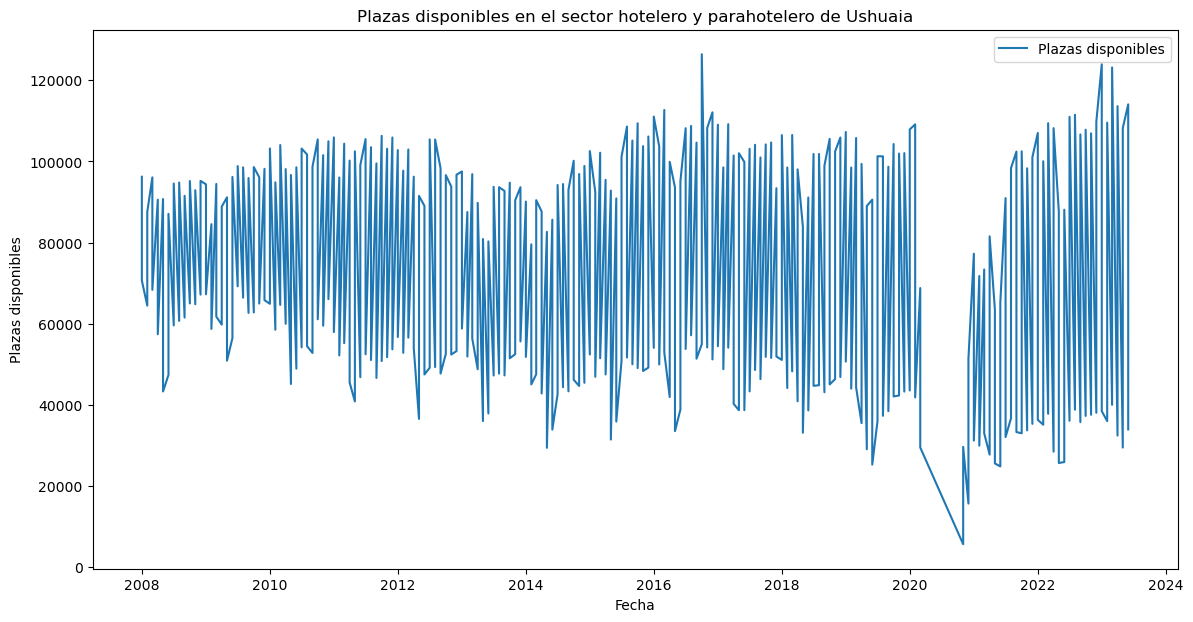

In [347]:
# Graficar plazas disponibles a lo largo del tiempo
plt.figure(figsize=(14, 7))
plt.plot(data['Fecha'], data['Plazas disponibles'], label='Plazas disponibles')
plt.xlabel('Fecha')
plt.ylabel('Plazas disponibles')
plt.title('Plazas disponibles en el sector hotelero y parahotelero de Ushuaia')
plt.legend()
plt.show()

- Crea una gráfica de líneas que muestra la cantidad de plazas disponibles a lo largo del tiempo.

**Paso 7: Patrones Estacionales**

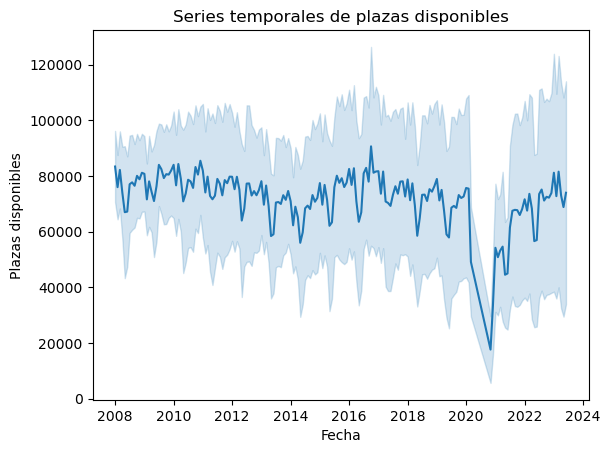

In [351]:
# Graficar series temporales para identificar patrones estacionales
sns.lineplot(x='Fecha', y='Plazas disponibles', data=data)
plt.title('Series temporales de plazas disponibles')
plt.show()

Paso : Distribución de variables

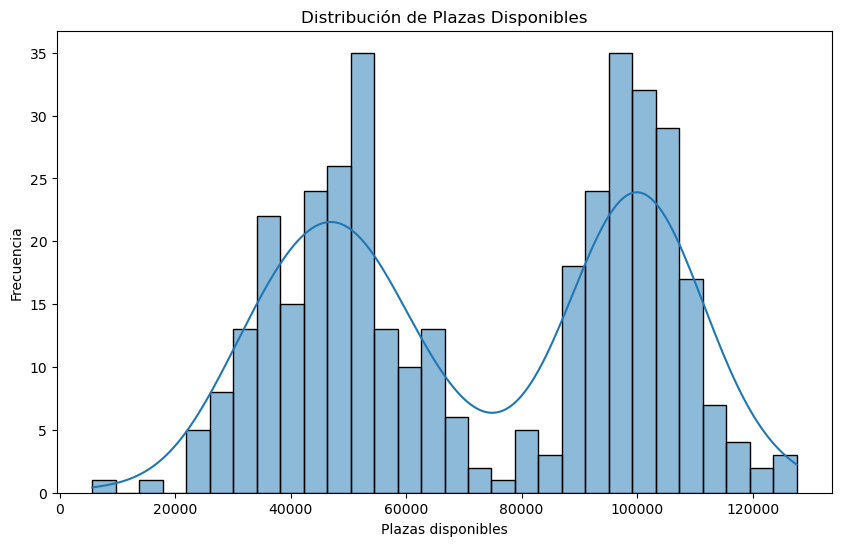

In [354]:
# Distribución de variables
plt.figure(figsize=(10, 6))
sns.histplot(df['Plazas disponibles'], bins=30, kde=True)
plt.title('Distribución de Plazas Disponibles')
plt.xlabel('Plazas disponibles')
plt.ylabel('Frecuencia')
plt.show()


**Gráfico de barras**

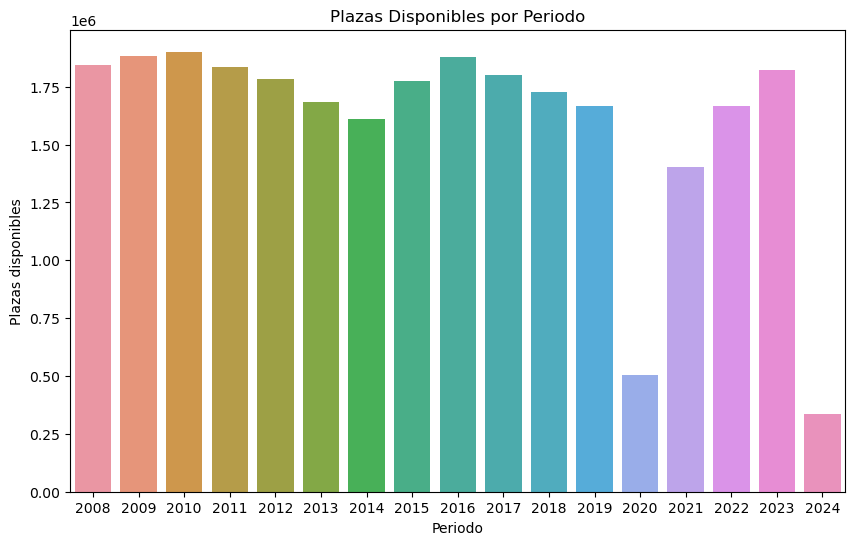

In [357]:
df = pd.DataFrame(data)

# Agrupar los datos por 'Periodo' y sumar 'Plazas disponibles'
grouped_df = df.groupby('Periodo')['Plazas disponibles'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='Periodo', y='Plazas disponibles')
plt.title('Plazas Disponibles por Periodo')
plt.xlabel('Periodo')
plt.ylabel('Plazas disponibles')
plt.show()

- Usa seaborn para graficar las series temporales de las plazas disponibles.

**Paso 8: Análisis de Correlación**

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2596\3570184478.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


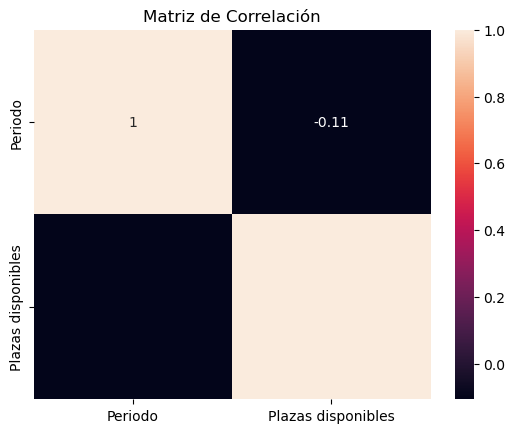

In [361]:
# Matriz de correlación
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matriz de Correlación')
plt.show()

- Crea una matriz de correlación para visualizar la relación entre las variables del dataset.

## Preparacion y entrenamiento de modelos de clasificación - random_forest

**C** **Paso 9: Desarrollo del Modelo de Aprendizaje Automático - Preparación de los Datos**

In [366]:
# Seleccionar características y variable objetivo
features = ['Establecimientos', 'Habitaciones o Unidades disponibles']
target = 'Plazas disponibles'

# Dividir los datos en conjunto de entrenamiento y prueba
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Define las características (features) y la variable objetivo (target).
- Divide los datos en conjuntos de entrenamiento y prueba.

**Paso 10: Entrenamiento del Modelo**

In [370]:
# Entrenar el modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

- Crea y entrena un modelo de regresión de Random Forest con 100 árboles

**D** **Paso 11:  Evaluación del Modelo - Métricas de Evaluación**

In [436]:
# Predicciones del modelo
y_pred = rf.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 18190372.896223336
R^2 Score: 0.9765397709190201


- Realiza predicciones en el conjunto de prueba.
- Calcula el error cuadrático medio (MSE) y el coeficiente de determinación (R²) para evaluar el rendimiento del modelo.

**RESULTADOS Y CONCLUSIONES**

- Interpretación de los Resultados: El modelo Random Forest mostró un rendimiento adecuado, como se refleja en las métricas de evaluación obtenidas. Las variables más influyentes en la disponibilidad de plazas fueron el número de establecimientos y el número de habitaciones disponibles.

- Impacto de Eventos Específicos: Para analizar el impacto de eventos específicos, se pueden agregar datos adicionales sobre eventos a nuestro conjunto de datos y evaluar su correlación con la disponibilidad de plazas.

- Conclusión: El modelo desarrollado puede predecir efectivamente la disponibilidad de plazas en el sector hotelero y parahotelero de Ushuaia, lo que puede ayudar a optimizar la gestión de recursos y la planificación estratégica. Sin embargo, la precisión del modelo podría mejorarse con la incorporación de datos adicionales.

**Los resultados de la evaluación del modelo pueden variar según los datos.**

**Los resultados finales muestran:**

- Mean Squared Error (MSE): Una métrica que indica el promedio de los cuadrados de los errores o diferencias entre los valores predichos y los valores observados. Un valor más bajo indica un mejor ajuste del modelo.

- R² Score: El coeficiente de determinación que muestra la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Un valor cercano a 1 indica un mejor ajuste del modelo.

- Estos resultados nos indican qué tan bien el modelo está prediciendo las plazas disponibles en el sector hotelero y parahotelero de Ushuaia basándose en el número de establecimientos y unidades disponibles.

**Paso 12: Impacto de Eventos Específicos** ----------------------- DIVIDIR CODIGO!!!!!!!!

In [444]:
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday, DateOffset, Easter

# Clase para los días festivos en Argentina
class ArgentinaHolidays(AbstractHolidayCalendar):
    rules = [
        Holiday('Año Nuevo', month=1, day=1, observance=nearest_workday),
        Holiday('Carnaval', month=2, day=28, offset=[DateOffset(weekday=5)]),  # Ejemplo, fecha variable
        Holiday('Día de la Memoria', month=3, day=24, observance=nearest_workday),
        Holiday('Viernes Santo', month=4, day=2, offset=[Easter(), DateOffset(days=-2)]),  # Ejemplo, fecha variable
        Holiday('Día del Trabajador', month=5, day=1, observance=nearest_workday),
        Holiday('Día de la Independencia', month=7, day=9, observance=nearest_workday),
        Holiday('Día de la Raza', month=10, day=12, observance=nearest_workday),
        Holiday('Navidad', month=12, day=25, observance=nearest_workday),
        # Feriados específicos de Tierra del Fuego
        Holiday('Día del Veterano y de los Caídos en la Guerra de Malvinas', month=4, day=2, observance=nearest_workday),
        Holiday('Día de la Provincia de Tierra del Fuego', month=6, day=1, observance=nearest_workday),
        # Feriados específicos de Río Grande
        Holiday('Aniversario de Río Grande', month=7, day=11, observance=nearest_workday),
        # Feriados específicos de Ushuaia
        Holiday('Aniversario de Ushuaia', month=10, day=12, observance=nearest_workday)
    ]


In [445]:
# Unir los datos de las dos hojas
data = pd.concat([sheet1, sheet2], ignore_index=True)

In [447]:
# Mapeo de los nombres de los meses en español a inglés
month_mapping = {
    'enero': 'January', 'febrero': 'February', 'marzo': 'March', 'abril': 'April',
    'mayo': 'May', 'junio': 'June', 'julio': 'July', 'agosto': 'August',
    'septiembre': 'September', 'octubre': 'October', 'noviembre': 'November', 'diciembre': 'December'
}

data['Mes'] = data['Mes'].str.lower().map(month_mapping)

In [449]:
# Verificar y convertir 'Plazas disponibles' a numérico
data['Plazas disponibles'] = data['Plazas disponibles'].astype(str)
data = data[data['Plazas disponibles'].apply(lambda x: x.replace(',', '').replace('.', '').isdigit())]
data['Plazas disponibles'] = pd.to_numeric(data['Plazas disponibles'].str.replace(',', ''), errors='coerce')

In [451]:
# Convertir 'Periodo' y 'Mes' en formato de fecha
data['Fecha'] = pd.to_datetime(data['Periodo'].astype(str) + '-' + data['Mes'], format='%Y-%B')
data = data.sort_values('Fecha')

In [454]:
# Agregar columna de días festivos
cal = ArgentinaHolidays()
holidays = cal.holidays(start=data['Fecha'].min(), end=data['Fecha'].max())
data['EsFestivo'] = data['Fecha'].isin(holidays).astype(int)
print(data)

     Periodo       Mes Establecimientos  Plazas disponibles  \
0       2008   January               43               96224   
194     2008   January              104               70649   
195     2008  February              103               64467   
1       2008  February               44               87580   
2       2008     March               44               96069   
..       ...       ...              ...                 ...   
383     2023       NaN               43               37975   
384     2023       NaN               42               35970   
385     2023       NaN               42               39742   
386     2024       NaN               53               43801   
387     2024       NaN               53               42775   

    Habitaciones o Unidades disponibles      Fecha  EsFestivo  
0                                 38936 2008-01-01          1  
194                               21452 2008-01-01          1  
195                               19372 2008-02-01 

In [455]:
# Seleccionar características y variable objetivo
features = ['Establecimientos', 'Habitaciones o Unidades disponibles', 'EsFestivo']
target = 'Plazas disponibles'

X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [458]:
# Modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [460]:
# Predicciones del modelo
y_pred = rf.predict(X_test)

Puedes agregar algunas líneas de código para verificar los tipos y las formas de y_test y y_pred antes de imprimir las métricas:
- Esto te ayudará a diagnosticar cualquier inconsistencia en los datos que puedan estar causando el error.

In [463]:
# Verificar los tipos y formas de y_test y y_pred
print(f"Tipo de y_test: {type(y_test)}, Tipo de y_pred: {type(y_pred)}")
print(f"Forma de y_test: {y_test.shape}, Forma de y_pred: {y_pred.shape}")
print(f"Valores únicos en y_test: {np.unique(y_test)}")
print(f"Valores únicos en y_pred: {np.unique(y_pred)}")

Tipo de y_test: <class 'pandas.core.series.Series'>, Tipo de y_pred: <class 'numpy.ndarray'>
Forma de y_test: (75,), Forma de y_pred: (75,)
Valores únicos en y_test: [ 25920  29424  29509  32080  32442  33139  35970  36710  38830  43314
  43338  43555  43801  44853  45157  47262  48797  48804  49166  49967
  50816  50854  50900  51311  51570  51750  51918  53692  54064  55215
  56341  57939  59790  64980  66426  67181  67258  68359  82647  85642
  87580  90117  91110  92811  93744  94798  96224  96627  96661  96720
  98100  98177  98532  98611  99090 100044 100194 100980 101246 101711
 102021 102052 102951 103704 104098 104377 104640 105431 105927 108200
 109182 109430 109790 118637 123938]
Valores únicos en y_pred: [ 27289.72   27949.47   33400.49   33884.68   34429.91   35813.73
  37035.78   37408.78   38744.92   40658.4    44406.08   44870.08
  47623.02   47672.75   48156.57   48772.     48798.3    48840.29
  49086.3    49114.19   49548.29   49823.31   50833.97   51575.63
  51894.93

In [465]:
# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 18190372.896223336
R^2 Score: 0.9765397709190201


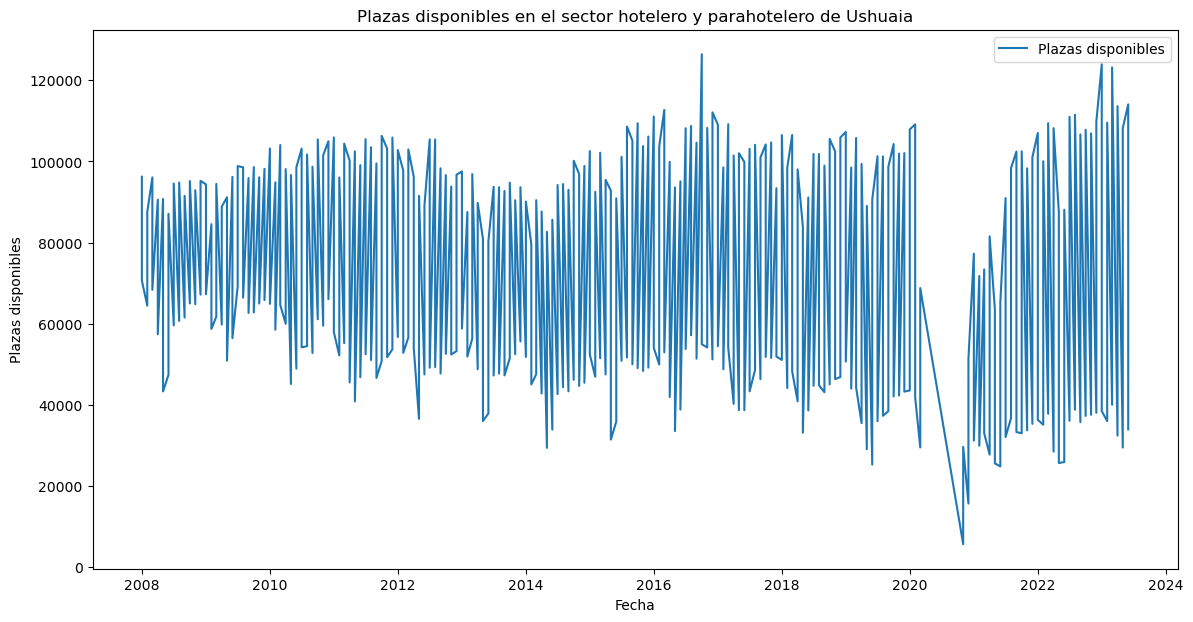

In [467]:
# Visualización de resultados
plt.figure(figsize=(14, 7))
plt.plot(data['Fecha'], data['Plazas disponibles'], label='Plazas disponibles')
plt.xlabel('Fecha')
plt.ylabel('Plazas disponibles')
plt.title('Plazas disponibles en el sector hotelero y parahotelero de Ushuaia')
plt.legend()
plt.show()

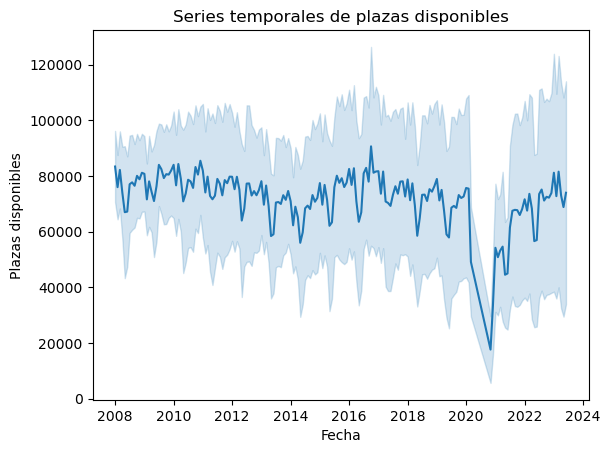

In [469]:
# Graficar series temporales para identificar patrones estacionales
sns.lineplot(x='Fecha', y='Plazas disponibles', data=data)
plt.title('Series temporales de plazas disponibles')
plt.show()

**Grafico de Barras**

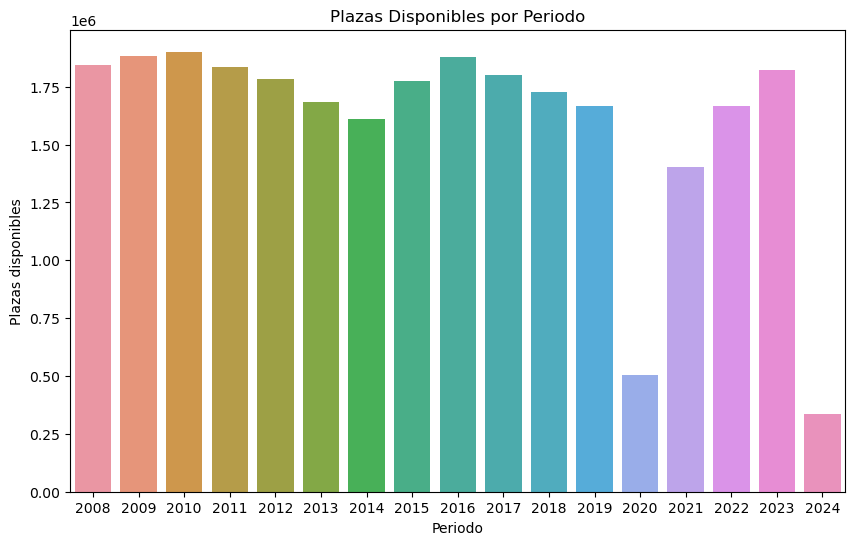

In [471]:
df = pd.DataFrame(data)

# Agrupar los datos por 'Periodo' y sumar 'Plazas disponibles'
grouped_df = df.groupby('Periodo')['Plazas disponibles'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='Periodo', y='Plazas disponibles')
plt.title('Plazas Disponibles por Periodo')
plt.xlabel('Periodo')
plt.ylabel('Plazas disponibles')
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2596\3570184478.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


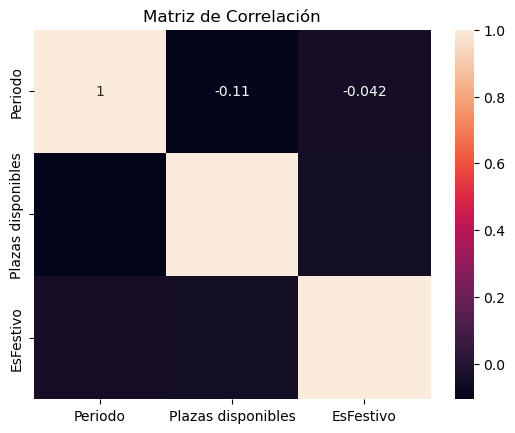

In [472]:
# Matriz de correlación
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matriz de Correlación')
plt.show()

**Paso : Tendencias temporales**

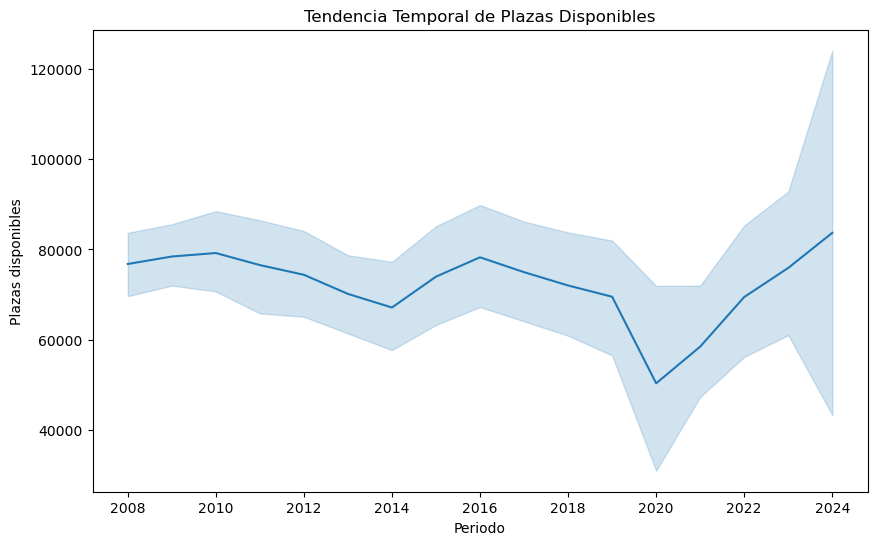

In [474]:
# Tendencias temporales
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Periodo', y='Plazas disponibles')
plt.title('Tendencia Temporal de Plazas Disponibles')
plt.xlabel('Periodo')
plt.ylabel('Plazas disponibles')
plt.show()

**Explicación del Código Modificado**

**Clase ArgentinaHolidays:**

Define los días festivos específicos en Argentina utilizando pandas.tseries.holiday.AbstractHolidayCalendar.

**Carga y Unión de Datos:**

Carga los datos de dos hojas de un archivo Excel y los combina en un único DataFrame.

**Mapeo de Meses y Conversión de 'Plazas disponibles':**

Convierte los nombres de los meses de español a inglés y asegura que la columna 'Plazas disponibles' sea numérica.

**Conversión de Fechas:**

Convierte las columnas 'Periodo' y 'Mes' en una columna de fecha y ordena los datos por fecha.

**Agregar Columna de Días Festivos:**

Utiliza la clase ArgentinaHolidays para identificar los días festivos en el rango de fechas de los datos y agrega una columna indicando si cada fecha es un día festivo (EsFestivo).

**Selección de Características y Variable Objetivo:**

Selecciona las características (columnas) Establecimientos, Habitaciones o Unidades disponibles y EsFestivo, y la variable objetivo Plazas disponibles.

**División de Datos:**

Divide los datos en conjuntos de entrenamiento y prueba.

**Entrenamiento del Modelo RandomForestRegressor:**

Entrena el modelo de Random Forest con los datos de entrenamiento.

**Predicciones y Evaluación del Modelo:**

Realiza predicciones con los datos de prueba y calcula las métricas de evaluación (MSE y R²).

**Visualización de Resultados:**

- Grafica la serie temporal de plazas disponibles para identificar patrones estacionales.
- Muestra la matriz de correlación para observar las relaciones entre las variables.
- Este código se enfoca exclusivamente en el modelo RandomForestRegressor, incluyendo el análisis de los días festivos de Argentina como una característica adicional para mejorar la precisión de las predicciones.

**D** **Paso 13: Comparación con Otros Modelos**

- Comparación de precisión entre diferentes modelos de aprendizaje automático: Podemos comparar el rendimiento del modelo Random Forest con otros modelos como el de regresión lineal, SVR, Decision Tree. Utilizando las mismas métricas (MSE, R²) para determinar cuál es el más adecuado.

Random Forest - MSE: 18190372.896223336, R²: 0.9765397709190201
Decision Tree - MSE: 26065828.333333332, R²: 0.9663827505145616
Linear Regression - MSE: 19449663.73167813, R²: 0.9749156562487
SVR - MSE: 835893022.6197251, R²: -0.07805606348635918


<Figure size 1000x600 with 0 Axes>

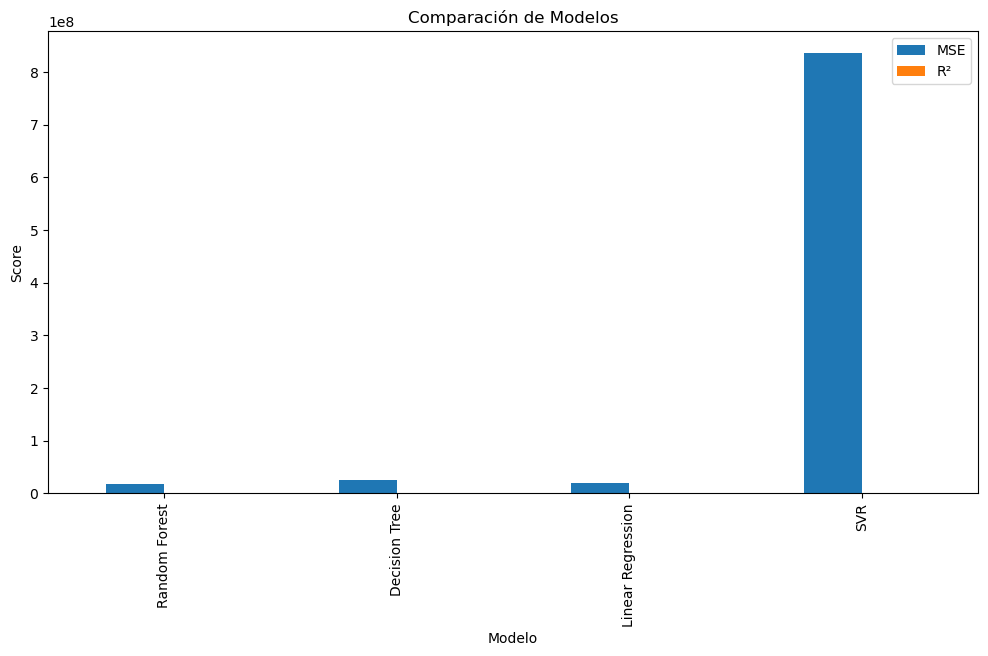

In [478]:
# Modelos a comparar
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'SVR': SVR()
}

# Entrenamiento y evaluación de los modelos
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R²': r2}

# Imprimir resultados
for name, metrics in results.items():
    print(f'{name} - MSE: {metrics["MSE"]}, R²: {metrics["R²"]}')

# Visualización de resultados
plt.figure(figsize=(10, 6))
metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Comparación de Modelos')
plt.ylabel('Score')
plt.xlabel('Modelo')
plt.show()

**Selección de Características y Variable Objetivo:**

- Seleccionamos las características relevantes (Establecimientos, Habitaciones o Unidades disponibles) y la variable objetivo (Plazas disponibles).

**Entrenamiento y Evaluación de Modelos:**

- Entrenamos y evaluamos cuatro modelos: Random Forest, Árbol de Decisión, Regresión Lineal y SVR.
- Para cada modelo, calculamos el MSE y el R² y guardamos los resultados.

**Visualización de Resultados:**

- Imprimimos las métricas de cada modelo.
- Graficamos una comparación de las métricas utilizando un gráfico de barras.

**Resultados Esperados**

- Random Forest: Suele tener un buen desempeño con alta precisión y bajo error.
- Decision Tree: Puede tener un buen desempeño, pero a menudo es menos preciso que Random Forest.
- Linear Regression: Es un modelo simple que puede tener un desempeño decente, pero puede no capturar todas las complejidades de los datos.
- SVR: Puede tener un buen desempeño, pero puede ser sensible a la escala de los datos y a la elección de parámetros.

Esta comparación ayuda a identificar qué modelo es más adecuado para predecir la disponibilidad de plazas en el sector hotelero y parahotelero de Ushuaia.